<a href="https://colab.research.google.com/github/moniiandrea/Class_Data/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
**Titanic Passenger Data**

This dataset contains information about the passengers aboard the RMS Titanic, which tragically sank during its maiden voyage in April 1912. It provides detailed data points for survival analysis and predictive modeling, including demographic details, ticket class, fare, and survival outcomes.

**Dataset Highlights:**
* Passenger Details: Information such as Name, Age, Gender, and Embarked Port.
* Socioeconomic Status: Passenger Class (1st, 2nd, or 3rd) and Fare Price.
* Survival Information: Whether the passenger survived or perished.
* Family Relationships: Number of Siblings/Spouses and Parents/Children aboard.

This dataset is ideal for exploring patterns of survival, understanding social dynamics aboard the Titanic, and testing machine learning models for classification problems.

**Link:** [Kaggle](https://www.kaggle.com/datasets/alyelbadry/titanic-survive-model?resource=download)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/moniiandrea/Class_Data/refs/heads/main/titanic-passengers.csv",sep=';',
                 encoding='utf-8')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
(df.isnull().sum()/(len(df)))*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [8]:
df_clean = df.copy()

In [9]:
# Removing column 'Cabin' because there are 77% off missing values
df_clean = df_clean.drop(['Cabin'], axis=1)
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [10]:
df_clean = df_clean.dropna(subset=['Embarked'])

In [11]:
# change of type of variables because there aren't a number
df_clean['PassengerId'] = df_clean['PassengerId'].astype(str)
df_clean['Pclass'] = df_clean['Pclass'].astype(str)
df_clean['Ticket'] = df_clean['Ticket'].astype(str)
df_clean['SibSp'] = df_clean['SibSp'].astype(str)
df_clean['Parch'] = df_clean['Parch'].astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    object 
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    object 
 7   Parch        889 non-null    object 
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), object(9)
memory usage: 83.3+ KB


In [12]:
print('min of Age', df_clean['Age'].min())
print('max of Age', df_clean['Age'].max())
print('mean of Age', df_clean['Age'].mean())
print('median of Age', df_clean['Age'].median())
print('mode of Age', df_clean['Age'].mode())

min of Age 0.42
max of Age 80.0
mean of Age 29.64209269662921
median of Age 28.0
mode of Age 0    24.0
Name: Age, dtype: float64


array([<Axes: >, <Axes: >], dtype=object)

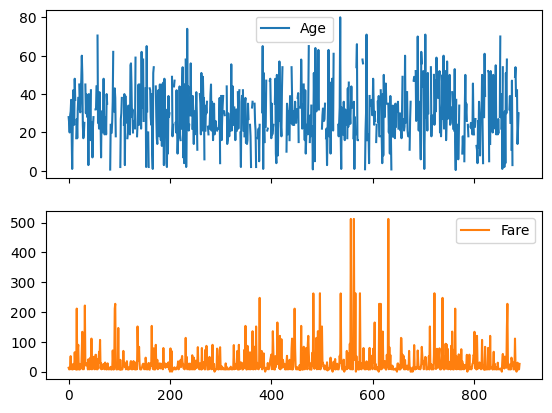

In [13]:
df_clean.plot(kind='line', subplots=True)

In [14]:
df_clean.shape

(889, 11)

In [15]:
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].mean())

array([<Axes: >, <Axes: >], dtype=object)

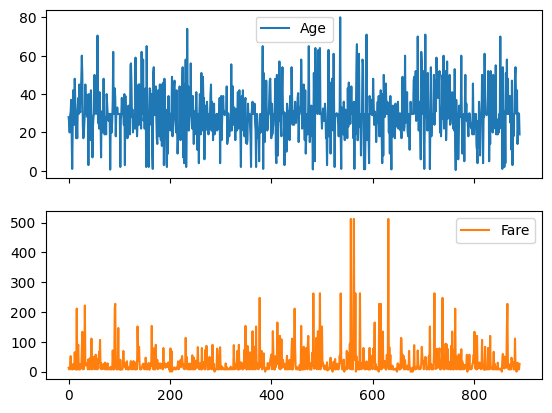

In [18]:
df_clean.plot(kind='line', subplots=True)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    object 
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    object 
 7   Parch        889 non-null    object 
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), object(9)
memory usage: 83.3+ KB


In [17]:
print('Original',df.shape)
print('Clean',df_clean.shape)

Original (891, 12)
Clean (889, 11)
